# Лабораторна робота 04

## 1. Завдання лабораторної роботи
Задачею є виконати передбачення на основі створених даних про подальші результати гри.

## 2. Опис використаних технологій
Для виконання задачі я використав Jupyter Notebook для кращої візуалізації, мову Python та бібліотеки pandas для маніпуляцій з даними, matplotlib для візуалізації та модель лінійної регресії з scikit-learn

## 3. Опис програмного коду
Весь код можна побачити нижче, а репозиторій можна знайти за адресою https://github.com/gazinaft/PIIS

### Імпорт бібліотек

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import manifold
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import seaborn as sns

ModuleNotFoundError: No module named 'sklearn'

### Читання з файлу

In [6]:
df = pd.read_csv('./search/result.csv')

minimax = df[df.Agent == 'ExpectimaxAgent'][['Time', 'Score']]
expectimax = df[df.Agent == 'MiniMaxAgent'][['Time', 'Score']]

### Розподіл даних

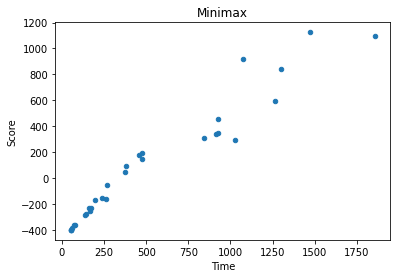

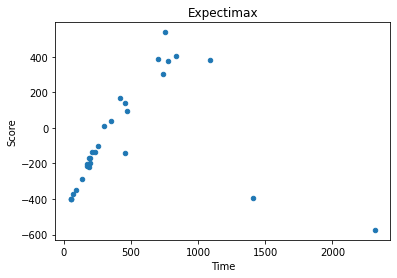

In [8]:
minimax.plot(x = 'Time', y = 'Score', kind = 'scatter', title = 'Minimax')
expectimax.plot(x = 'Time', y = 'Score', kind = 'scatter', title = 'Expectimax')
plt.show()

### Розподіл даних на тренувальні та контрольні

In [ ]:
def X_y_split(df, target):
    inputs = df.drop(target, axis=1)
    targets = df[target]
    return inputs, targets

min_train, min_test = model_selection.train_test_split(
    minimax, test_size=0.25,
    random_state=42,
    shuffle=True,
    stratify=minimax.Score
)

x_min_train, y_min_train = X_y_split(min_train, 'Score')
x_min_test, y_min_test = X_y_split(min_test, 'Score')

exp_train, exp_test = model_selection.train_test_split(
    expectimax, test_size=0.25,
    random_state=42,
    shuffle=True,
    stratify=expectimax.Score
)

class_names = ['Time', 'Score']
x_exp_train, y_exp_train = X_y_split(exp_train, 'Score')
x_exp_test, y_exp_test = X_y_split(exp_test, 'Score')

### Тренування моделі

In [ ]:
min_regr = LinearRegression()
exp_regr = LinearRegression()

min_regr.fit(x_min_train, y_min_train)
exp_regr.fit(x_exp_train, y_exp_train)

### Результати тренування моделі

In [ ]:
min_preds = min_regr.predict(x_min_test)
exp_preds = exp_regr.predict(x_exp_test)

### Аналіз результатів досліджень

In [ ]:
matrix_min = metrics.confusion_matrix(
    y_true=y_min_test,
    y_pred=min_preds
)
sns.heatmap(data=matrix_min, annot=True)

report_min = metrics.classification_report(
    y_true=y_min_test,
    y_pred=min_preds,
    target_names=class_names,
)
print(report_min)

In [ ]:
matrix_exp = metrics.confusion_matrix(
    y_true=y_exp_test,
    y_pred=exp_preds
)
sns.heatmap(data=matrix_exp, annot=True)

report_exp = metrics.classification_report(
    y_true=y_exp_test,
    y_pred=exp_preds,
    target_names=class_names,
)
print(report_exp)

### Перевірка на валідність результату

In [ ]:
dev_min = np.std(y_min_train)
dev_exp = np.std(y_exp_train)

err_min = metrics.mean_absolute_error(y_pred=min_preds, y_true=y_min_test)
err_exp = metrics.mean_absolute_error(y_pred=exp_preds, y_true=y_exp_test)

print(dev_min > err_min)
print(dev_exp > err_exp)